# Метод опорных векторов - Support Vector Machines 
## Упражнения

## Подделка вина

Чаще всего вино подделывают, разбавляя его более дешёвыми продуктами (например, соком), а иногда и с помощью опасных химикатов или подсластителей (чтобы добавить цвет или вкус).

Другой тип подделки - продажа более дешёвых вин под более дорогими марками.

## Цели проекта

Компания-дистрибьютор вина недавно столкнулась с подделками. В итоге был проведён аудит различных вин с помощью химического анализа. Компания занимается экспортом очень качественных и дорогих вин, но один из поставщиков попытался передать дешёвое вино под видом более дорогого. Компания-дистрибьютор наняла Вас, чтобы Вы создали модель машинного обучения, которая предскажет низкое качество вина (то есть, "подделку"). Они хотят узнать, возможно ли определить разницу между дешёвыми и дорогими винами.


---
---

**ЗАДАНИЕ: Обшая цель - используя данные ниже, разработайте модель машинного обучения, которая будет предсказывать на основе некоторых химических тестов, является ли вино настоящим или поддельным. Выполните задания ниже.**

---
---

## Выполните задания, написанные жирным шрифтом

**ЗАДАНИЕ: запустите ячейки ниже, чтобы импортировать библиотеки и загрузить данные.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**ЗАДАНИЕ: Сколько различных значений находится в целевой колонке quality, значения которой мы будем предсказывать?**

In [4]:
target_col = 'quality'
target_values = df[target_col].unique()
print(target_values)

['Legit' 'Fraud']


**ЗАДАНИЕ: Нарисуйте график countplot, отображающий количество для каждой из категорий - Legit и Fraud.**

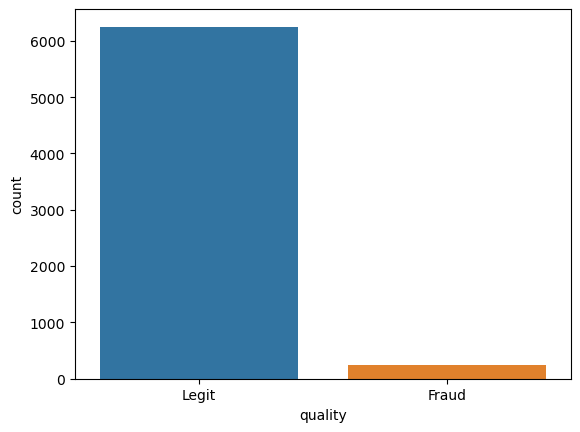

In [5]:
sns.countplot(x='quality', data=df)
plt.show()

**ЗАДАНИЕ: Давайте выясним, есть ли разница в количестве подделок в зависимости от того, красное вино или белое. Нарисуйте график countplot, отображая *тип* вина по оси x, и разбивая значения Fraud и Legit с помощью параметра hue.**

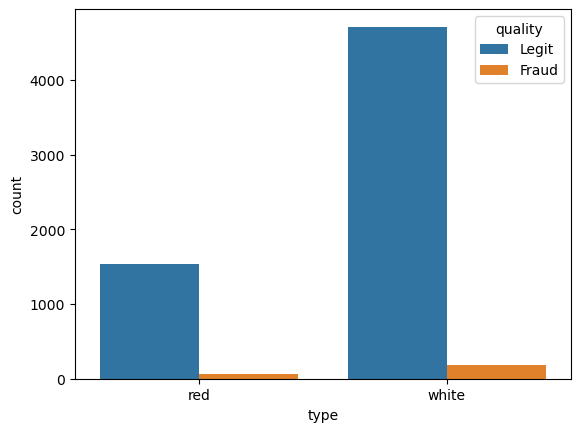

In [6]:
sns.countplot(x='type', hue='quality', data=df)
plt.show()

**ЗАДАНИЕ: Какой процент красных вин является подделкой? Какой процент белых вин является подделкой?**

In [7]:
# Фильтруем данные по типу вина
red_wine = df[df['type'] == 'red']
white_wine = df[df['type'] == 'white']
# Считаем количество записей каждой категории в колонке "quality"
red_counts = red_wine['quality'].value_counts()
white_counts = white_wine['quality'].value_counts()
# Вычисляем процент подделок для каждого типа вина
red_fraud_percent = red_counts['Fraud'] / red_counts.sum() * 100
white_fraud_percent = white_counts['Fraud'] / white_counts.sum() * 100
print("Percentage of fraud in red wine: {:.16f}%".format(red_fraud_percent))
print("Percentage of fraud in white wine: {:.16f}%".format(white_fraud_percent))

Percentage of fraud in red wine: 3.9399624765478425%
Percentage of fraud in white wine: 3.7362188648427925%


**ЗАДАНИЕ: Вычислите корреляцию между различными признаками и колонкой "quality". Чтобы сделать это, Вам можете использовать значения 0 и 1 вместо текстовых значений Legit и Fraud.**

In [8]:
import pandas as pd
df = pd.read_csv("wine_fraud.csv")
# Преобразуем значения в колонке "quality" из текстовых в числовые
df['quality'] = df['quality'].apply(lambda x: 1 if x == 'Fraud' else 0)
# Вычисляем корреляцию между колонкой "quality" и другими признаками
correlations = df.corr()['quality'].drop('quality')
print(correlations)


fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Name: quality, dtype: float64


**ЗАДАНИЕ: Нарисуйте график bar plot, отобразив значения корреляции для поддельных вин.**

<AxesSubplot:>

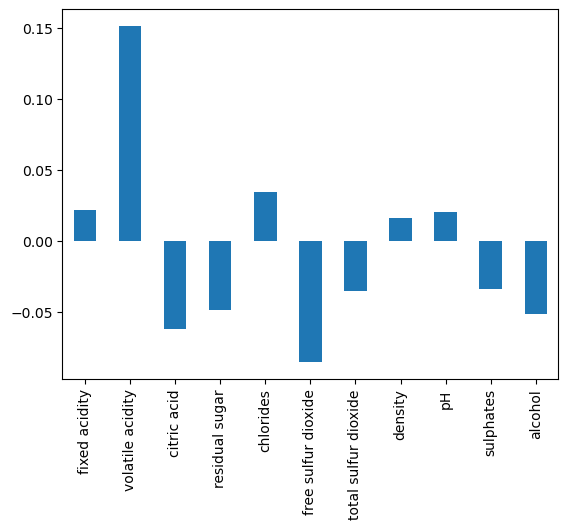

In [9]:
# Строим график
correlations.plot.bar()

**ЗАДАНИЕ: Нарисуйте график clustermap с помощью seaborn, чтобы исследовать связи между переменными.**

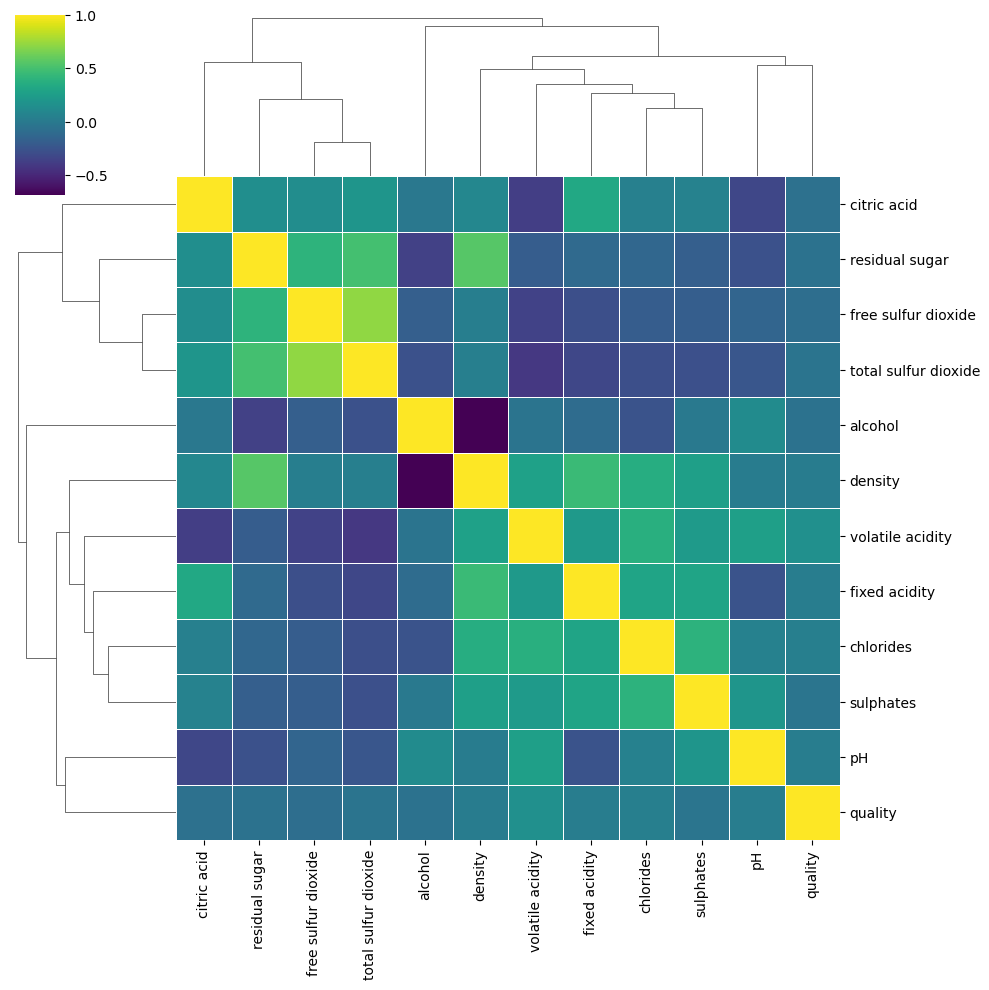

In [10]:
# Вычисление матрицы корреляций
corr_matrix = df.corr()
# Создание объекта ClusterGrid
g = sns.clustermap(corr_matrix, cmap="viridis", linewidths=.5, figsize=(10, 10))
plt.show()

----
## Модель машинного обучения

**ЗАДАНИЕ: Сконвертируйте категориальную колонку "type" из текстовых значений "red" и "white" в dummy-переменные:**

In [11]:
# Напишите Ваш код здесь
df = pd.get_dummies(df, columns=['type'])


**ЗАДАНИЕ: Разделите данные на признаки X и целевую переменную y (колонка "quality")**

In [12]:
X = df.drop('quality', axis=1)
y = df['quality']


**ЗАДАНИЕ: Разбейте данные на обучающий и тестовый набор данных, в отношении 90% и 10%. Замечание - в решении мы используем random state = 101**

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)


**ЗАДАНИЕ: Смасштабируйте данные в наборах X train и X test.**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**ЗАДАНИЕ: Создайте экземпляр классификатора Support Vector Machine. Раньше мы оставляли эту модель "пустой" (то есть, без параметров). Однако, поскольку мы знаем, что классы несбалансированы, для решения этой проблемы мы можем автоматически подобрать веса обратно пропорционально тому, как часто встречаются классы во входных переменных, используя параметр в вызове метода SVC(). Выясните в онлайн-документации по SVC, что это за параметр.**

In [15]:
# Напишите Ваш код здесь
from sklearn.svm import SVC

# Создаем экземпляр классификатора SVC
svc = SVC(class_weight='balanced')

Здесь параметр class_weight установлен в значение 'balanced', что означает, что веса классов будут автоматически подобраны обратно пропорционально их частоте в обучающих данных.

**ЗАДАНИЕ: С помощью GridSearchCV выполните поиск по сетке значений параметров C и gamma.**

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid)
grid.fit(X_train_scaled, y_train)
print(grid)


GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})


In [17]:
print(grid.best_params_)


{'C': 1, 'gamma': 'auto'}


**ЗАДАНИЕ: Отобразите матрицу "confusion matrix" и отчёт "classification report" для Вашей модели.**

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
# делаем предсказания на тестовых данных
y_pred = grid.predict(X_test)
# выводим матрицу ошибок
print(confusion_matrix(y_test, y_pred))
# выводим отчет классификации
print(classification_report(y_test, y_pred))


C:\Users\Drama\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


[[623   0]
 [ 27   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       623
           1       0.00      0.00      0.00        27

    accuracy                           0.96       650
   macro avg       0.48      0.50      0.49       650
weighted avg       0.92      0.96      0.94       650



C:\Users\Drama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Drama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Drama\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
